In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Summary statistics of datasets

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

In [3]:
figure_path = "data_summary_figures"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

## Read datasets

In [58]:
dataset_paths = [
    "../data/MOBA_scRNAseq/outs_S3/filtered_data_maxpool_processed.h5ad",
    "../data/MOBA_scRNAseq/outs_S2/filtered_data_maxpool_processed.h5ad",
    "../data/MOBA_scRNAseq/outs_S1/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/B subtilis minimal media/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/B_subilis_DNA-damage-30min/filtered_data_maxpool_processed.h5ad",
    # "../data/probe_Bac_scRNAseq_Rosenthal/Sporulation/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/MPA_energy_stress/filtered_data_maxpool_processed.h5ad",
    "../data/BacDrop/antibiotics_data_processed_3.h5ad",
    "../data/BacDrop/untreated_data_processed.h5ad",
    "../data/BacDrop/klebsiella_BIDMC35_data_processed_2.h5ad",
    "../data/BacDrop/klebsiella_4species_data_processed.h5ad",
    "../data/BacDrop/ecoli_data_processed.h5ad",
    "../data/BacDrop/pseudomonas_data_processed.h5ad",
    "../data/BacDrop/enterococcus_data_processed.h5ad",

]

dataset_names = [
    "Pseudomonas_balanced_PB",
    "Pseudomonas_li_PB",
    "Ecoli_balanced_PB",
    "Bsub_minmed_PB",
    "Bsub_damage_PB",
    # "Bsub_sporulation_PB",
    "Bsub_MPA_PB",
    "Klebs_antibiotics_BD",
    "Klebs_untreated_BD",
    "Klebs_BIDMC35_BD",
    "Klebs_4species_BD",
    "Ecoli_4species_BD",
    "Pseudomonas_4species_BD",
    "Efaecium_4species_BD"

]

In [5]:
datasets = [sc.read_h5ad(p) for p in dataset_paths]

In [6]:
datasets[0].obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,outlier,n_genes,total_counts_norm,total_counts_scale,embedding_reliability,reliability_score,null_reliability_score,leiden_opt
AAACCCAGTGGACCTC-1,395,5.981414,485.0,6.186209,False,395,-5625.422870,-307.356788,trustworthy,0.620122,0.369130,0
AAACCCATCCTGTAGA-1,558,6.326149,863.0,6.761573,False,558,-5642.047140,-352.574158,undefined,0.436530,0.266097,1
AAACGCTCAGATTTCG-1,398,5.988961,491.0,6.198479,False,398,-5619.632838,-275.803481,undefined,0.485311,0.090063,0
AAACGCTTCTTTGCTA-1,598,6.395262,1013.0,6.921658,False,598,-5656.035258,-392.238400,trustworthy,0.635283,0.296364,1
AAAGAACCAGTCTGGC-1,897,6.800170,1190.0,7.082549,False,897,-5471.060147,332.338933,undefined,0.361818,0.249581,2
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCTCCTCGCAT-1,592,6.385194,924.0,6.829794,False,592,-5653.550180,-368.307093,undefined,0.467531,0.232678,1
TTTGGAGCACCGAATT-1,1930,7.565793,5446.0,8.602820,False,1930,-5500.093382,147.299941,undefined,0.227927,0.404180,1
TTTGGAGCAGCAGTTT-1,604,6.405228,748.0,6.618739,False,604,-5546.446564,59.564718,undefined,0.533020,0.177839,2
TTTGGTTTCGTTGTGA-1,371,5.918894,470.0,6.154858,False,371,-5662.340861,-420.981502,undefined,0.094074,0.334136,1


[None]

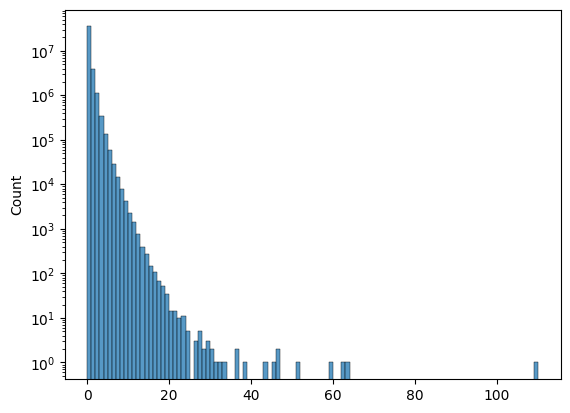

In [7]:
g = sns.histplot(datasets[4].layers["counts"].toarray().flatten(), binwidth=1)
g.set(yscale="log")

In [59]:


summary_stats = {
    "n_cells": [data.X.shape[0] for data in datasets],
    "n_genes": [data.X.shape[1] for data in datasets],
    "min_seq_depth": [np.min(data.obs["total_counts"]) for data in datasets],
    "max_seq_depth": [np.max(data.obs["total_counts"]) for data in datasets],
    "median_seq_depth": [np.median(data.obs["total_counts"]) for data in datasets],
    "zero_counts": [((np.prod(data.X.shape) - data.layers["counts"].getnnz()) / np.prod(data.X.shape)).round(3) for data in datasets],
    "count_max": [np.max(data.layers["counts"].toarray()) for data in datasets],
    "count_95%": [np.percentile(data.layers["counts"].toarray(), 95) for data in datasets],
    "count_99%": [np.percentile(data.layers["counts"].toarray(), 99) for data in datasets],

}

summary_df = pd.DataFrame(summary_stats, index=dataset_names)
summary_df

,n_cells,n_genes,min_seq_depth,max_seq_depth,median_seq_depth,zero_counts,count_max,count_95%,count_99%
Pseudomonas_balanced_PB,1544,5553,413.0,5704.0,794.5,0.862,136.0,1.0,3.0
Pseudomonas_li_PB,1255,5540,360.0,4464.0,647.0,0.881,80.0,1.0,2.0
Ecoli_balanced_PB,3386,3968,103.0,495.0,163.0,0.963,14.0,0.0,1.0
Bsub_minmed_PB,2784,2952,141.0,1289.0,325.0,0.911,45.0,1.0,2.0
Bsub_damage_PB,13801,2959,268.0,1839.0,555.0,0.861,110.0,1.0,3.0
Bsub_MPA_PB,6703,2937,136.0,948.0,267.0,0.940,105.0,1.0,2.0
Klebs_antibiotics_BD,19638,2500,14.0,275.0,21.0,0.992,13.0,0.0,0.0
Klebs_untreated_BD,48511,2500,12.0,728.0,21.0,0.991,30.0,0.0,0.0
Klebs_BIDMC35_BD,9168,2500,15.0,371.0,45.0,0.990,26.0,0.0,0.0
Klebs_4species_BD,315,1265,9.0,196.0,19.0,0.978,10.0,0.0,1.0


In [60]:
summary_df.columns = ["Cells", "Genes", "Minimum seq. depth", "Maximum seq. depth", "Median seq. depth", "Zero counts (percentage)", "Maximum count", "95% quantile", "99% quantile"]

In [61]:
print(summary_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
 & Cells & Genes & Minimum seq. depth & Maximum seq. depth & Median seq. depth & Zero counts (percentage) & Maximum count & 95% quantile & 99% quantile \\
\midrule
Pseudomonas_balanced_PB & 1544 & 5553 & 413.000000 & 5704.000000 & 794.500000 & 0.862000 & 136.000000 & 1.000000 & 3.000000 \\
Pseudomonas_li_PB & 1255 & 5540 & 360.000000 & 4464.000000 & 647.000000 & 0.881000 & 80.000000 & 1.000000 & 2.000000 \\
Ecoli_balanced_PB & 3386 & 3968 & 103.000000 & 495.000000 & 163.000000 & 0.963000 & 14.000000 & 0.000000 & 1.000000 \\
Bsub_minmed_PB & 2784 & 2952 & 141.000000 & 1289.000000 & 325.000000 & 0.911000 & 45.000000 & 1.000000 & 2.000000 \\
Bsub_damage_PB & 13801 & 2959 & 268.000000 & 1839.000000 & 555.000000 & 0.861000 & 110.000000 & 1.000000 & 3.000000 \\
Bsub_MPA_PB & 6703 & 2937 & 136.000000 & 948.000000 & 267.000000 & 0.940000 & 105.000000 & 1.000000 & 2.000000 \\
Klebs_antibiotics_BD & 19638 & 2500 & 14.000000 & 275.000000 & 21.000000 & 0.992000

In [62]:
summary_df["Protocol"] = [
    "ProBac-seq",        
    "ProBac-seq",
    "ProBac-seq",
    # "ProBac-seq",
    "ProBac-seq",
    "ProBac-seq",
    "ProBac-seq",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",

]

In [63]:
all_seq_depths = []
all_dataset_names = []
all_protocols = []
all_zeros = []
all_ngenes = []
i = 0
for data in datasets:
    for x in data.obs["total_counts"].tolist():
        all_seq_depths.append(x)
        all_dataset_names.append(dataset_names[i])
        all_protocols.append(summary_df.loc[dataset_names[i], "Protocol"])
    for x in data.obs["n_genes_by_counts"].tolist():
        all_ngenes.append(x)
        all_zeros.append(1 - (x/summary_stats["n_genes"][i]))
        
    i += 1

seq_depth_df = pd.DataFrame({
    "Dataset": all_dataset_names, 
    "Sequencing depth": all_seq_depths, 
    "Protocol": all_protocols,
    "Number of genes": all_ngenes,
    "Zero counts (percentage)": all_zeros
})
seq_depth_df

,Dataset,Sequencing depth,Protocol,Number of genes,Zero counts (percentage)
0,Pseudomonas_balanced_PB,485.0,ProBac-seq,395,0.928867
1,Pseudomonas_balanced_PB,863.0,ProBac-seq,558,0.899514
2,Pseudomonas_balanced_PB,491.0,ProBac-seq,398,0.928327
3,Pseudomonas_balanced_PB,1013.0,ProBac-seq,598,0.892310
4,Pseudomonas_balanced_PB,1190.0,ProBac-seq,897,0.838466
...,...,...,...,...,...
110299,Efaecium_4species_BD,22.0,BacDrop,19,0.988169
110300,Efaecium_4species_BD,21.0,BacDrop,21,0.986924
110301,Efaecium_4species_BD,17.0,BacDrop,16,0.990037
110302,Efaecium_4species_BD,16.0,BacDrop,15,0.990660


/tmp/ipykernel_1803278/2539378001.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


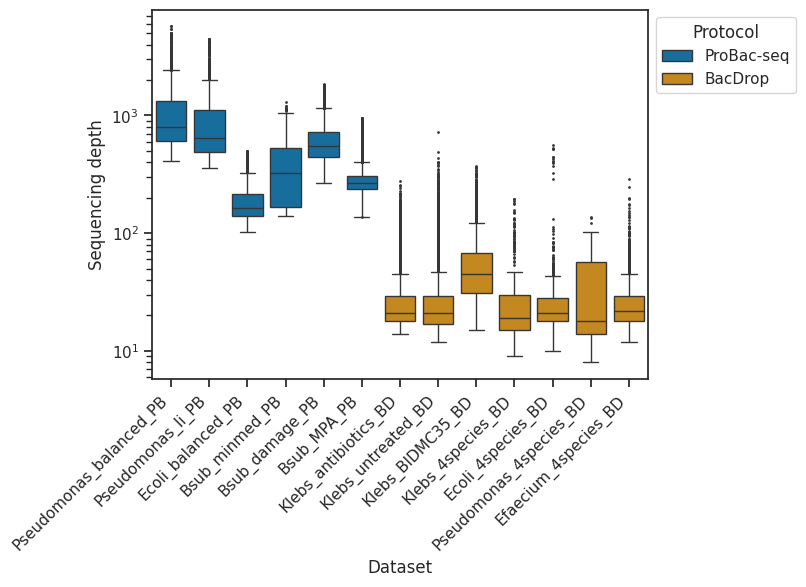

In [64]:
g = sns.boxplot(seq_depth_df, x="Dataset", y="Sequencing depth", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="colorblind")
g.set(yscale="log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [65]:
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m
df

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


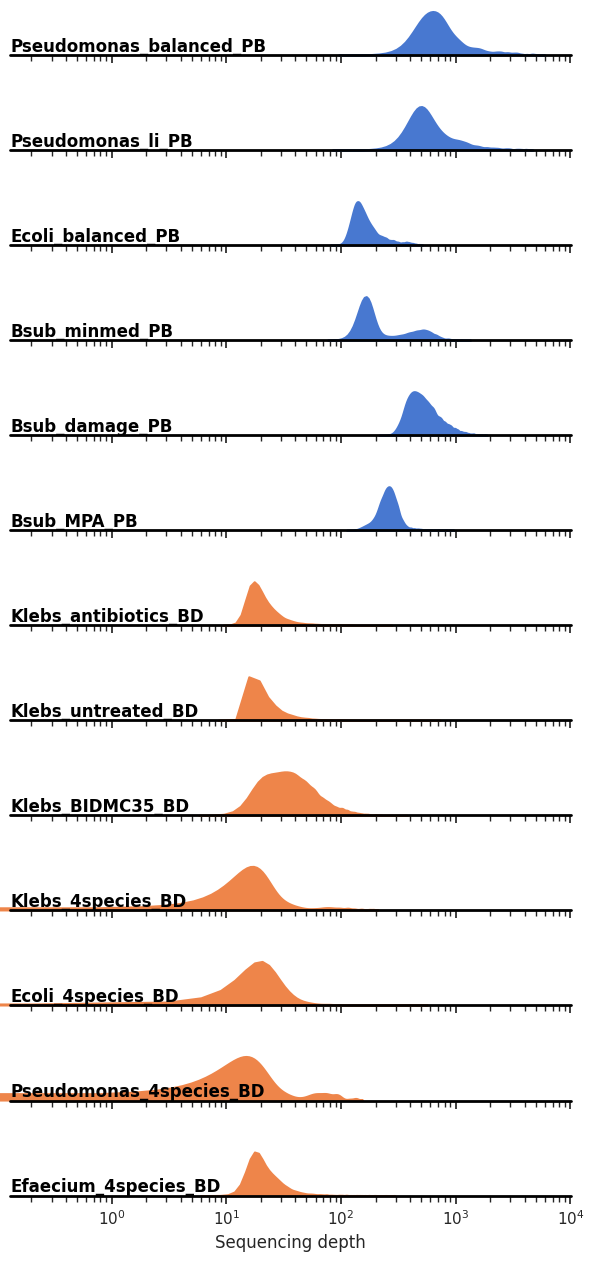

In [127]:
seq_depth_df["log(Sequencing depth)"] = np.log(seq_depth_df["Sequencing depth"])
g = sns.FacetGrid(seq_depth_df.reset_index(), row="Dataset", hue="Protocol", aspect=7, height=1, palette="muted", sharey=False)
g.map(sns.kdeplot, "Sequencing depth",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5).set(xscale = 'log')
# g.map(sns.kdeplot, "Sequencing depth", clip_on=False, color="w", lw=2, bw_adjust=.5).set(xscale = 'log')
g.refline(y=0, linewidth=2, linestyle="-", color="black", clip_on=False)

for i in range(len(g.axes)):
    ax = g.axes[i][0]
    ax.text(0, .2, dataset_names[i], fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)


# g.figure.subplots_adjust(hspace=-.25)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.savefig(figure_path + "/seqdepth_densities.png", format="png", bbox_inches='tight', dpi=300)
# plt.savefig(figure_path + "/seqdepth_densities_v2.png", format="png", bbox_inches='tight', dpi=300)

plt.show()

In [67]:
seq_depth_df

,Dataset,Sequencing depth,Protocol,Number of genes,Zero counts (percentage),log(Sequencing depth)
0,Pseudomonas_balanced_PB,485.0,ProBac-seq,395,0.928867,6.184149
1,Pseudomonas_balanced_PB,863.0,ProBac-seq,558,0.899514,6.760415
2,Pseudomonas_balanced_PB,491.0,ProBac-seq,398,0.928327,6.196444
3,Pseudomonas_balanced_PB,1013.0,ProBac-seq,598,0.892310,6.920672
4,Pseudomonas_balanced_PB,1190.0,ProBac-seq,897,0.838466,7.081709
...,...,...,...,...,...,...
110299,Efaecium_4species_BD,22.0,BacDrop,19,0.988169,3.091042
110300,Efaecium_4species_BD,21.0,BacDrop,21,0.986924,3.044522
110301,Efaecium_4species_BD,17.0,BacDrop,16,0.990037,2.833213
110302,Efaecium_4species_BD,16.0,BacDrop,15,0.990660,2.772589


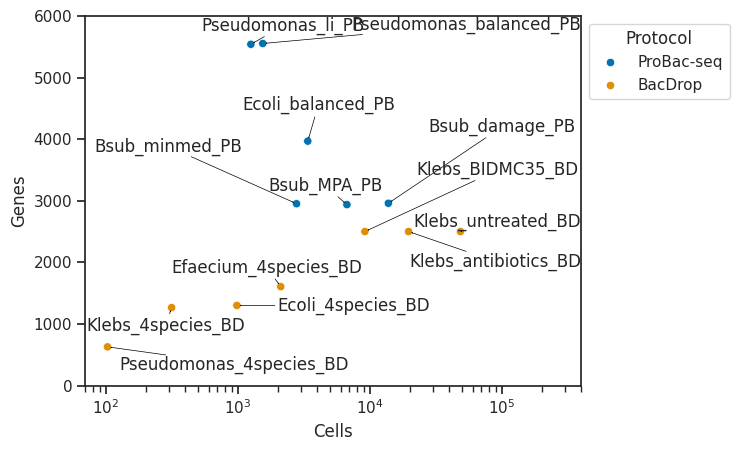

In [68]:
from adjustText import adjust_text

g = sns.scatterplot(summary_df, x="Cells", y="Genes", hue="Protocol", palette="colorblind")
g.set(xscale="log", ylim=(0, 6000), xlim=(70, 400000))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

texts = [plt.text(summary_df["Cells"].tolist()[i], summary_df["Genes"].tolist()[i], summary_df.index.tolist()[i]) for i in range(len(dataset_names))]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5), expand=(1.2, 2), expand_axes=False)

plt.show()

/tmp/ipykernel_1803278/4124598785.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right")


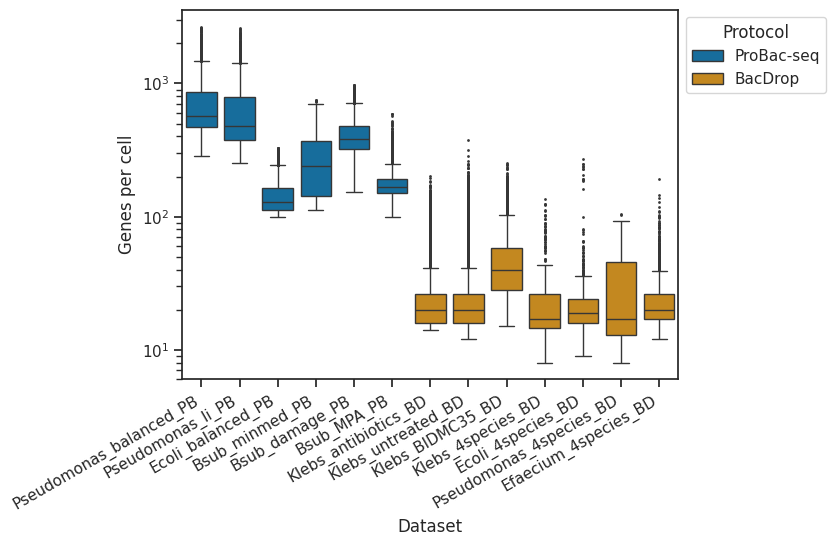

In [69]:
g = sns.boxplot(seq_depth_df, x="Dataset", y="Number of genes", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="colorblind")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(ylabel="Genes per cell", yscale="log")
plt.show()

In [70]:
summary_df

,Cells,Genes,Minimum seq. depth,Maximum seq. depth,Median seq. depth,Zero counts (percentage),Maximum count,95% quantile,99% quantile,Protocol
Pseudomonas_balanced_PB,1544,5553,413.0,5704.0,794.5,0.862,136.0,1.0,3.0,ProBac-seq
Pseudomonas_li_PB,1255,5540,360.0,4464.0,647.0,0.881,80.0,1.0,2.0,ProBac-seq
Ecoli_balanced_PB,3386,3968,103.0,495.0,163.0,0.963,14.0,0.0,1.0,ProBac-seq
Bsub_minmed_PB,2784,2952,141.0,1289.0,325.0,0.911,45.0,1.0,2.0,ProBac-seq
Bsub_damage_PB,13801,2959,268.0,1839.0,555.0,0.861,110.0,1.0,3.0,ProBac-seq
Bsub_MPA_PB,6703,2937,136.0,948.0,267.0,0.940,105.0,1.0,2.0,ProBac-seq
Klebs_antibiotics_BD,19638,2500,14.0,275.0,21.0,0.992,13.0,0.0,0.0,BacDrop
Klebs_untreated_BD,48511,2500,12.0,728.0,21.0,0.991,30.0,0.0,0.0,BacDrop
Klebs_BIDMC35_BD,9168,2500,15.0,371.0,45.0,0.990,26.0,0.0,0.0,BacDrop
Klebs_4species_BD,315,1265,9.0,196.0,19.0,0.978,10.0,0.0,1.0,BacDrop


/tmp/ipykernel_1803278/2516472668.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


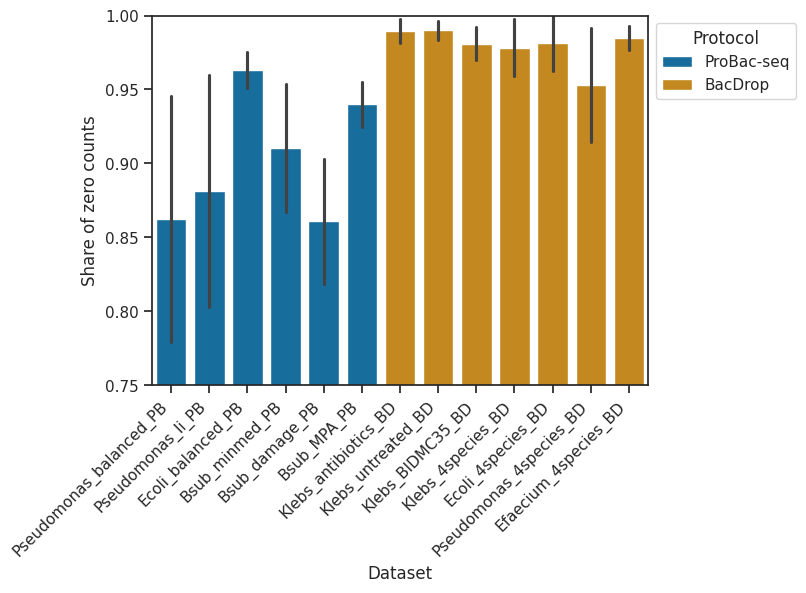

In [71]:
g = sns.barplot(seq_depth_df, x="Dataset", y="Zero counts (percentage)", hue="Protocol", palette="colorblind", errorbar="sd")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
g.set(ylim=(0.75, 1), ylabel="Share of zero counts")
plt.show()

               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0
/tmp/ipykernel_1803278/2353786108.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subfigs_left[1].set_xticklabels(subfigs_left[1].get_xticklabels(), rotation=30, horizontalalignment="right")
/tmp/ipykernel_1803278/2353786108.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subfigs_left[2].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")


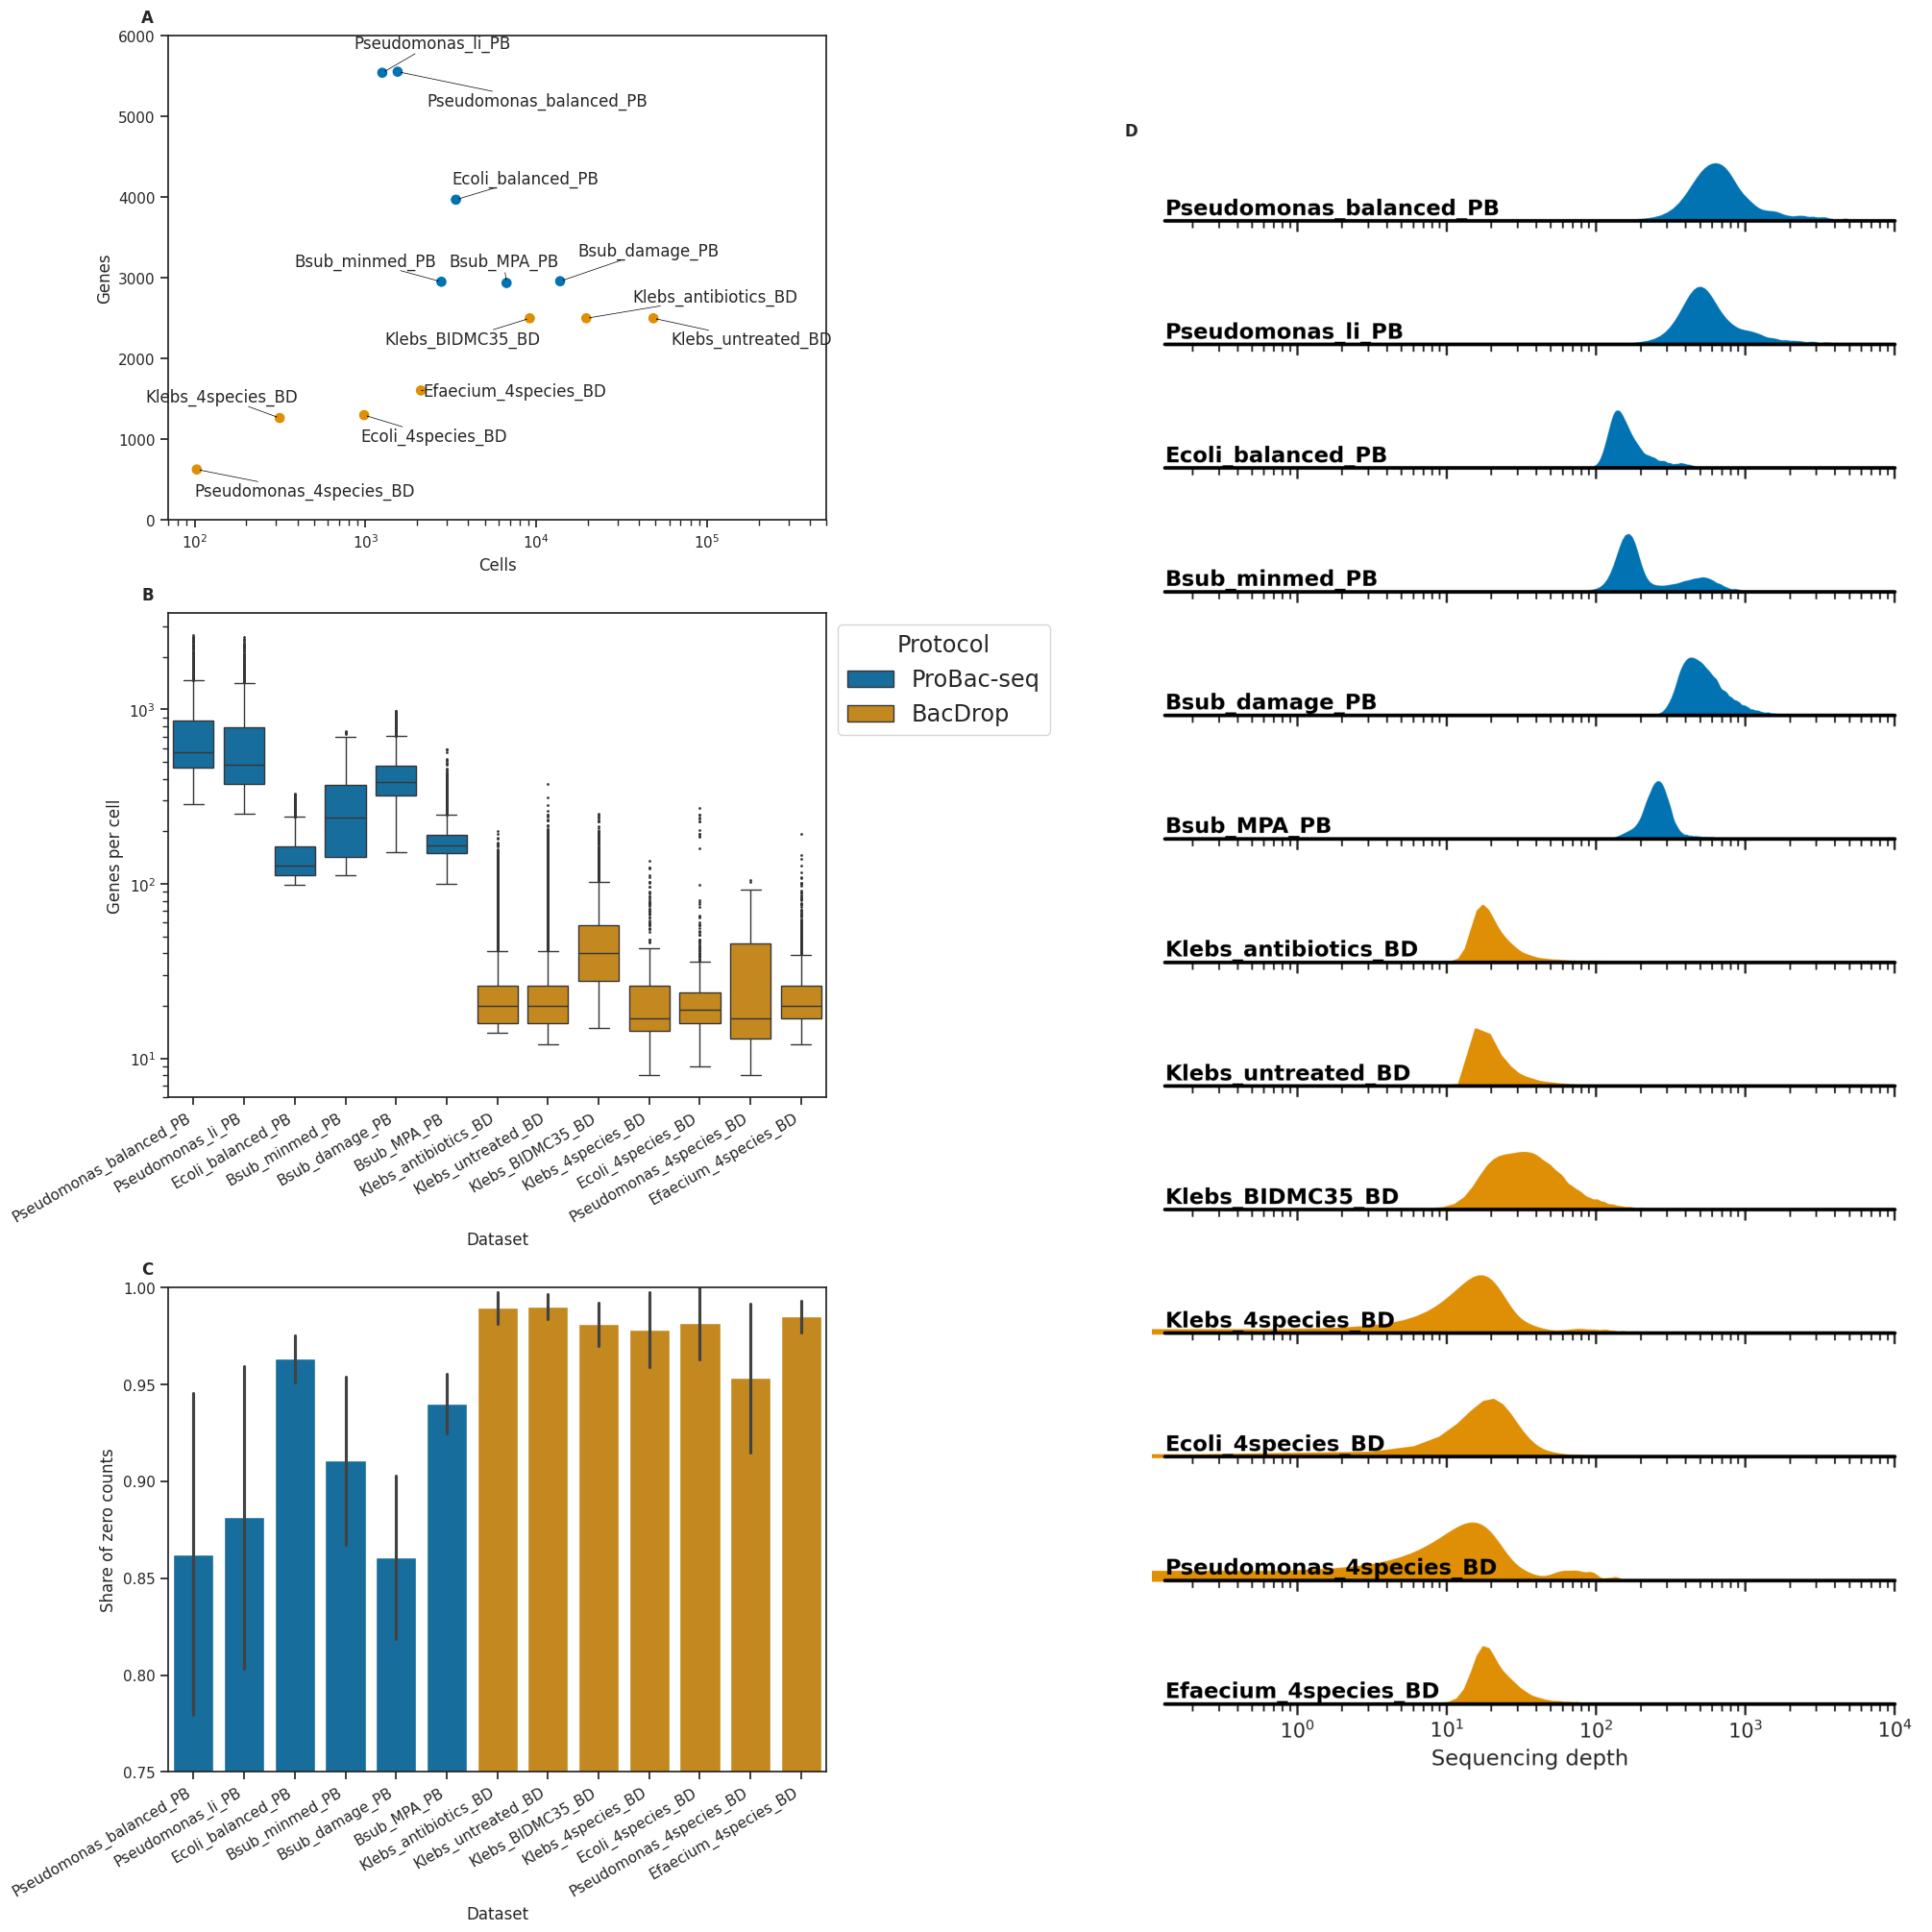

In [72]:
fig = plt.figure(layout='constrained', figsize=(20, 20))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.3,1])

subfigs_left = subfigs[0].subplots(3, 1)

sns.scatterplot(summary_df, x="Cells", y="Genes", hue="Protocol", palette="colorblind", ax=subfigs_left[0], s=70)
subfigs_left[0].set(xscale="log", ylim=(0, 6000), xlim=(70, 500000))
subfigs_left[0].legend([],[], frameon=False)
texts = [subfigs_left[0].text(summary_df["Cells"].tolist()[i], summary_df["Genes"].tolist()[i], summary_df.index.tolist()[i]) for i in range(len(dataset_names))]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5), expand=(1.5, 3), expand_axes=False, ax=subfigs_left[0])

g = sns.boxplot(seq_depth_df, x="Dataset", y="Number of genes", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="colorblind", ax=subfigs_left[1])
subfigs_left[1].set_xticklabels(subfigs_left[1].get_xticklabels(), rotation=30, horizontalalignment="right")
subfigs_left[1].legend(fontsize='x-large', title_fontsize='x-large', bbox_to_anchor=(1, 1), loc="upper left", title="Protocol")
# sns.move_legend(subfigs_left[1], "upper left", bbox_to_anchor=(1, 1))
subfigs_left[1].set(ylabel="Genes per cell", yscale="log")

sns.barplot(seq_depth_df, x="Dataset", y="Zero counts (percentage)", hue="Protocol", palette="colorblind", ax=subfigs_left[2], errorbar="sd")
subfigs_left[2].legend([],[], frameon=False)
subfigs_left[2].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")
subfigs_left[2].set(ylim=(0.75, 1), ylabel="Share of zero counts")

subfigs_right = subfigs[1].subplots(1, 1)
img = mpimg.imread(figure_path + "/seqdepth_densities.png")
subfigs_right.imshow(img)
subfigs_right.axis('off')

axes = [subfigs_left[0], subfigs_left[1], subfigs_left[2], subfigs_right]
labels = ["A", "B", "C", "D"]

for ax, label in zip(axes, labels):
    if type(ax) == np.ndarray:
        ax = ax[0]
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontweight="bold")

plt.savefig(figure_path + "/data_exploration.png", format="png", bbox_inches='tight', dpi=300)
plt.savefig(figure_path + "/data_exploration.png", format="png", bbox_inches='tight', dpi=300)

plt.show()

In [73]:
seq_depth_df.groupby("Dataset").agg({
    "Number of genes": ("mean", "median", "min", "max"),
    "Sequencing depth": ("mean", "median", "min", "max"),
    "Protocol": "first"
})

Number of genes                   Sequencing depth  \
                                   mean median  min   max             mean   
Dataset                                                                      
Bsub_MPA_PB                  176.488587  167.0  100   592       283.819185   
Bsub_damage_PB               411.903775  385.0  152   982       619.508659   
Bsub_minmed_PB               263.953305  241.0  113   755       364.804239   
Ecoli_4species_BD             24.141404   19.0    9   273        30.149542   
Ecoli_balanced_PB            146.476078  128.0   99   328       191.160957   
Efaecium_4species_BD          23.950308   20.0   12   193        27.159016   
Klebs_4species_BD             27.517460   17.0    8   136        33.742857   
Klebs_BIDMC35_BD              47.268652   40.0   15   254        55.669284   
Klebs_antibiotics_BD          26.586872   20.0   14   201        28.933445   
Klebs_untreated_BD            24.860794   20.0   12   374        27.224155   
Pseudomonas_4species_BD       29.359223   17.0    8   105        35.077670   
Pseudomonas_balanced_PB      764.053109  569.0  286  2673      1167.907383   
Pseudomonas_li_PB            657.440637  480.0  254  2590       963.486853   

                                                 Protocol  
                        median    min     max       first  
Dataset                                                    
Bsub_MPA_PB              267.0  136.0   948.0  ProBac-seq  
Bsub_damage_PB           555.0  268.0  1839.0  ProBac-seq  
Bsub_minmed_PB           325.0  141.0  1289.0  ProBac-seq  
Ecoli_4species_BD         21.0   10.0   556.0     BacDrop  
Ecoli_balanced_PB        163.0  103.0   495.0  ProBac-seq  
Efaecium_4species_BD      22.0   12.0   289.0     BacDrop  
Klebs_4species_BD         19.0    9.0   196.0     BacDrop  
Klebs_BIDMC35_BD          45.0   15.0   371.0     BacDrop  
Klebs_antibiotics_BD      21.0   14.0   275.0     BacDrop  
Klebs_untreated_BD        21.0   12.0   728.0     BacDrop  
Pseudomonas_4species_BD   18.0    8.0   137.0     BacDrop  
Pseudomonas_balanced_PB  794.5  413.0  5704.0  ProBac-seq  
Pseudomonas_li_PB        647.0  360.0  4464.0  ProBac-seq

## Processing parameters

In [23]:
processing_df = pd.DataFrame({
    "Minimum sequencing depth": ["-", "-", 100, 100, 100, 100, 15, 15, 15, 15, 15, 15, 15],
    "Minimum cells per gene": np.repeat(2, len(dataset_names)),
    "Median absolute deviation cutoff": [5, 5, 5, 5, 5, 10, 15, 15, 5, 10, 10, 10, 10],
    "Number of removed barcodes": [108, 71, 1376, 0, 61, 197, 1214846, 409547, 768, 8335, 8671, 8089, 7862],
    "Data distribution": ["NB", "NB", "Poi", "Poi", "Poi", "Poi", "Poi", "Poi", "Poi", "Poi", "NB", "Poi", "Poi"],
    "Latent dimension (k)": [x.uns["BacSC_params"]["k_opt"] for x in datasets],
    "n_neighbors": [x.uns["BacSC_params"]["n_neighbors_opt"] for x in datasets],
    "min_dist": [x.uns["BacSC_params"]["min_dist_opt"] for x in datasets],
    "clustering resolution": [x.uns["BacSC_params"]["res_opt"] for x in datasets],


}, index=dataset_names)

processing_df

,Minimum sequencing depth,Minimum cells per gene,Median absolute deviation cutoff,Number of removed barcodes,Data distribution,Latent dimension (k),n_neighbors,min_dist,clustering resolution
Pseudomonas_balanced_PB,-,2,5,108,NB,3,150,0.30,0.15
Pseudomonas_li_PB,-,2,5,71,NB,3,50,0.30,0.13
Ecoli_ProBac_PB,100,2,5,1376,Poi,2,50,0.05,0.07
Bsub_minmed_PB,100,2,5,0,Poi,4,20,0.50,0.15
Bsub_damage_PB,100,2,5,61,Poi,8,150,0.30,0.37
Bsub_MPA_PB,100,2,10,197,Poi,2,10,0.05,0.03
Klebs_antibiotics_BD,15,2,15,1214846,Poi,5,150,0.10,0.17
Klebs_untreated_BD,15,2,15,409547,Poi,3,70,0.05,0.01
Klebs_BIDMC35_BD,15,2,5,768,Poi,3,15,0.10,0.09
Klebs_4species_BD,15,2,10,8335,Poi,4,10,0.70,0.21


In [24]:
print(processing_df.to_latex())

\begin{tabular}{llrrrlrrrr}
\toprule
 & Minimum sequencing depth & Minimum cells per gene & Median absolute deviation cutoff & Number of removed barcodes & Data distribution & Latent dimension (k) & n_neighbors & min_dist & clustering resolution \\
\midrule
Pseudomonas_balanced_PB & - & 2 & 5 & 108 & NB & 3 & 150 & 0.300000 & 0.150000 \\
Pseudomonas_li_PB & - & 2 & 5 & 71 & NB & 3 & 50 & 0.300000 & 0.130000 \\
Ecoli_ProBac_PB & 100 & 2 & 5 & 1376 & Poi & 2 & 50 & 0.050000 & 0.070000 \\
Bsub_minmed_PB & 100 & 2 & 5 & 0 & Poi & 4 & 20 & 0.500000 & 0.150000 \\
Bsub_damage_PB & 100 & 2 & 5 & 61 & Poi & 8 & 150 & 0.300000 & 0.370000 \\
Bsub_MPA_PB & 100 & 2 & 10 & 197 & Poi & 2 & 10 & 0.050000 & 0.030000 \\
Klebs_antibiotics_BD & 15 & 2 & 15 & 1214846 & Poi & 5 & 150 & 0.100000 & 0.170000 \\
Klebs_untreated_BD & 15 & 2 & 15 & 409547 & Poi & 3 & 70 & 0.050000 & 0.010000 \\
Klebs_BIDMC35_BD & 15 & 2 & 5 & 768 & Poi & 3 & 15 & 0.100000 & 0.090000 \\
Klebs_4species_BD & 15 & 2 & 10 & 8335 & Poi

In [25]:
datasets[0].uns

{'BacSC_params': {'k_opt': 3,
  'min_dist_opt': 0.3,
  'n_neighbors_opt': 150,
  'res_opt': 0.15},
 'leiden_opt': {'params': {'n_iterations': -1,
   'random_state': 1234,
   'resolution': 0.15}},
 'leiden_opt_colors': array(['#1f77b4', '#d62728', '#e377c2', '#17becf'], dtype=object),
 'neighbors': {'connectivities_key': 'connectivities',
  'distances_key': 'distances',
  'params': {'method': 'umap',
   'metric': 'euclidean',
   'n_neighbors': 150,
   'n_pcs': 3,
   'random_state': 0}},
 'pca': {'params': {'use_highly_variable': False, 'zero_center': True},
  'variance': array([74.4464987 , 24.52095782, 18.86251683, 15.09290745, 10.48789735,
          9.03689402,  8.80053263,  8.71770492,  8.64468743,  8.62088475,
          8.54416456,  8.48355169,  8.43179147,  8.42024066,  8.36621915,
          8.34666949,  8.3016526 ,  8.2796696 ,  8.25339016,  8.21889182,
          8.19890458,  8.15502153,  8.14745619,  8.11512059,  8.10133702,
          8.08038203,  8.06573404,  8.05947835,  8.0187

## Raw datasets

In [75]:
raw_datasets = {}
dataset_names = [
    "Pseudomonas_balanced_PB",
    "Pseudomonas_li_PB",
    "Ecoli_balanced_PB",
    "Bsub_minmed_PB",
    "Bsub_damage_PB",
    # "Bsub_sporulation_PB",
    "Bsub_MPA_PB",
    "Klebs_antibiotics_BD",
    "Klebs_untreated_BD",
    "Klebs_BIDMC35_BD",
    "Klebs_4species_BD",
    "Ecoli_4species_BD",
    "Pseudomonas_4species_BD",
    "Efaecium_4species_BD"

]

In [76]:
data_path = "../data/MOBA_scRNAseq/outs_S3"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Pseudomonas_balanced_PB"] = data_maxpool

Aggregating feature 100/5572
Aggregating feature 200/5572
Aggregating feature 300/5572
Aggregating feature 400/5572
Aggregating feature 500/5572
Aggregating feature 600/5572
Aggregating feature 700/5572
Aggregating feature 800/5572
Aggregating feature 900/5572
Aggregating feature 1000/5572
Aggregating feature 1100/5572
Aggregating feature 1200/5572
Aggregating feature 1300/5572
Aggregating feature 1400/5572
Aggregating feature 1500/5572
Aggregating feature 1600/5572
Aggregating feature 1700/5572
Aggregating feature 1800/5572
Aggregating feature 1900/5572
Aggregating feature 2000/5572
Aggregating feature 2100/5572
Aggregating feature 2200/5572
Aggregating feature 2300/5572
Aggregating feature 2400/5572
Aggregating feature 2500/5572
Aggregating feature 2600/5572
Aggregating feature 2700/5572
Aggregating feature 2800/5572
Aggregating feature 2900/5572
Aggregating feature 3000/5572
Aggregating feature 3100/5572
Aggregating feature 3200/5572
Aggregating feature 3300/5572
Aggregating feature

In [77]:
data_path = "../data/MOBA_scRNAseq/outs_S2"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Pseudomonas_li_PB"] = data_maxpool

Aggregating feature 100/5572
Aggregating feature 200/5572
Aggregating feature 300/5572
Aggregating feature 400/5572
Aggregating feature 500/5572
Aggregating feature 600/5572
Aggregating feature 700/5572
Aggregating feature 800/5572
Aggregating feature 900/5572
Aggregating feature 1000/5572
Aggregating feature 1100/5572
Aggregating feature 1200/5572
Aggregating feature 1300/5572
Aggregating feature 1400/5572
Aggregating feature 1500/5572
Aggregating feature 1600/5572
Aggregating feature 1700/5572
Aggregating feature 1800/5572
Aggregating feature 1900/5572
Aggregating feature 2000/5572
Aggregating feature 2100/5572
Aggregating feature 2200/5572
Aggregating feature 2300/5572
Aggregating feature 2400/5572
Aggregating feature 2500/5572
Aggregating feature 2600/5572
Aggregating feature 2700/5572
Aggregating feature 2800/5572
Aggregating feature 2900/5572
Aggregating feature 3000/5572
Aggregating feature 3100/5572
Aggregating feature 3200/5572
Aggregating feature 3300/5572
Aggregating feature

In [78]:
data_path = "../data/MOBA_scRNAseq/outs_S1"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Ecoli_balanced_PB"] = data_maxpool

Aggregating feature 100/4181
Aggregating feature 200/4181
Aggregating feature 300/4181
Aggregating feature 400/4181
Aggregating feature 500/4181
Aggregating feature 600/4181
Aggregating feature 700/4181
Aggregating feature 800/4181
Aggregating feature 900/4181
Aggregating feature 1000/4181
Aggregating feature 1100/4181
Aggregating feature 1200/4181
Aggregating feature 1300/4181
Aggregating feature 1400/4181
Aggregating feature 1500/4181
Aggregating feature 1600/4181
Aggregating feature 1700/4181
Aggregating feature 1800/4181
Aggregating feature 1900/4181
Aggregating feature 2000/4181
Aggregating feature 2100/4181
Aggregating feature 2200/4181
Aggregating feature 2300/4181
Aggregating feature 2400/4181
Aggregating feature 2500/4181
Aggregating feature 2600/4181
Aggregating feature 2700/4181
Aggregating feature 2800/4181
Aggregating feature 2900/4181
Aggregating feature 3000/4181
Aggregating feature 3100/4181
Aggregating feature 3200/4181
Aggregating feature 3300/4181
Aggregating feature

In [79]:
data_path = "../data/probe_Bac_scRNAseq_Rosenthal/B subtilis minimal media"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Bsub_minmed_PB"] = data_maxpool

Aggregating feature 100/2959
Aggregating feature 200/2959
Aggregating feature 300/2959
Aggregating feature 400/2959
Aggregating feature 500/2959
Aggregating feature 600/2959
Aggregating feature 700/2959
Aggregating feature 800/2959
Aggregating feature 900/2959
Aggregating feature 1000/2959
Aggregating feature 1100/2959
Aggregating feature 1200/2959
Aggregating feature 1300/2959
Aggregating feature 1400/2959
Aggregating feature 1500/2959
Aggregating feature 1600/2959
Aggregating feature 1700/2959
Aggregating feature 1800/2959
Aggregating feature 1900/2959
Aggregating feature 2000/2959
Aggregating feature 2100/2959
Aggregating feature 2200/2959
Aggregating feature 2300/2959
Aggregating feature 2400/2959
Aggregating feature 2500/2959
Aggregating feature 2600/2959
Aggregating feature 2700/2959
Aggregating feature 2800/2959
Aggregating feature 2900/2959


In [80]:
data_path = "../data/probe_Bac_scRNAseq_Rosenthal/B_subilis_DNA-damage-30min"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Bsub_damage_PB"] = data_maxpool

Aggregating feature 100/2959
Aggregating feature 200/2959
Aggregating feature 300/2959
Aggregating feature 400/2959
Aggregating feature 500/2959
Aggregating feature 600/2959
Aggregating feature 700/2959
Aggregating feature 800/2959
Aggregating feature 900/2959
Aggregating feature 1000/2959
Aggregating feature 1100/2959
Aggregating feature 1200/2959
Aggregating feature 1300/2959
Aggregating feature 1400/2959
Aggregating feature 1500/2959
Aggregating feature 1600/2959
Aggregating feature 1700/2959
Aggregating feature 1800/2959
Aggregating feature 1900/2959
Aggregating feature 2000/2959
Aggregating feature 2100/2959
Aggregating feature 2200/2959
Aggregating feature 2300/2959
Aggregating feature 2400/2959
Aggregating feature 2500/2959
Aggregating feature 2600/2959
Aggregating feature 2700/2959
Aggregating feature 2800/2959
Aggregating feature 2900/2959


In [81]:
# data_path = "../data/probe_Bac_scRNAseq_Rosenthal/Sporulation"
# data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
# data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
# sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
# raw_datasets["Bsub_sporulation_PB"] = data_maxpool

In [82]:
data_path = "../data/probe_Bac_scRNAseq_Rosenthal/MPA_energy_stress"
data_all = sc.read_10x_h5(data_path + "/filtered_feature_bc_matrix.h5")
data_maxpool = up.prep_probe_BacSC_data(data_all, agg_fn=np.max)
sc.pp.calculate_qc_metrics(data_maxpool, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Bsub_MPA_PB"] = data_maxpool

Aggregating feature 100/2959
Aggregating feature 200/2959
Aggregating feature 300/2959
Aggregating feature 400/2959
Aggregating feature 500/2959
Aggregating feature 600/2959
Aggregating feature 700/2959
Aggregating feature 800/2959
Aggregating feature 900/2959
Aggregating feature 1000/2959
Aggregating feature 1100/2959
Aggregating feature 1200/2959
Aggregating feature 1300/2959
Aggregating feature 1400/2959
Aggregating feature 1500/2959
Aggregating feature 1600/2959
Aggregating feature 1700/2959
Aggregating feature 1800/2959
Aggregating feature 1900/2959
Aggregating feature 2000/2959
Aggregating feature 2100/2959
Aggregating feature 2200/2959
Aggregating feature 2300/2959
Aggregating feature 2400/2959
Aggregating feature 2500/2959
Aggregating feature 2600/2959
Aggregating feature 2700/2959
Aggregating feature 2800/2959
Aggregating feature 2900/2959


In [83]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456487_MGH66_Abx3_P2_align2._CDS.tsv", "GSM5456488_MGH66_Abx3_P3_align2._CDS.tsv", "GSM5456489_MGH66_Abx3_P4_align2._CDS.tsv",
              "GSM6081206_Abx2_S2_P2_CDS.tsv", "GSM6081207_Abx2_S2_P3_CDS.tsv", "GSM6081208_Abx2_S2_P4_CDS.tsv"]
adatas = []
for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    adatas.append(adata)
    
adatas[0].obs["treatment"] = "meropenem"
adatas[1].obs["treatment"] = "ciprofloxacin"
adatas[2].obs["treatment"] = "gentamicin"
adatas[3].obs["treatment"] = "meropenem"
adatas[4].obs["treatment"] = "ciprofloxacin"
adatas[5].obs["treatment"] = "gentamicin"


adatas[0].obs["replicate"] = 1
adatas[1].obs["replicate"] = 1
adatas[2].obs["replicate"] = 1
adatas[3].obs["replicate"] = 2
adatas[4].obs["replicate"] = 2
adatas[5].obs["replicate"] = 2

data_untr = ad.concat(adatas, join="outer", fill_value=0)
sc.pp.calculate_qc_metrics(data_untr, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Klebs_antibiotics_BD"] = data_untr

GSM5456487_MGH66_Abx3_P2_align2._CDS.tsv
GSM5456488_MGH66_Abx3_P3_align2._CDS.tsv
GSM5456489_MGH66_Abx3_P4_align2._CDS.tsv
GSM6081206_Abx2_S2_P2_CDS.tsv
GSM6081207_Abx2_S2_P3_CDS.tsv
GSM6081208_Abx2_S2_P4_CDS.tsv


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [84]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456486_MGH66_Abx3_P1_align2._CDS.tsv", "GSM6081205_Abx2_S2_P1_CDS.tsv"]

adatas = []
for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    adatas.append(adata)
    
adatas[0].obs["treatment"] = "untreated"
adatas[1].obs["treatment"] = "untreated"
adatas[0].obs["replicate"] = 1
adatas[1].obs["replicate"] = 2
    
data_untr = ad.concat(adatas, join="outer", fill_value=0)
sc.pp.calculate_qc_metrics(data_untr, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Klebs_untreated_BD"] = data_untr

GSM5456486_MGH66_Abx3_P1_align2._CDS.tsv
GSM6081205_Abx2_S2_P1_CDS.tsv


In [85]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456490_BIDMC35_align2_CDS.tsv"]

for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)

sc.pp.calculate_qc_metrics(adata, var_type="genes", percent_top=None, log1p=True, inplace=True)
   
raw_datasets["Klebs_BIDMC35_BD"] = adata

GSM5456490_BIDMC35_align2_CDS.tsv


In [86]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456506_Kp_CDS.tsv"]

for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    
sc.pp.calculate_qc_metrics(adata, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Klebs_4species_BD"] = adata

GSM5456506_Kp_CDS.tsv


In [87]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456503_Ec_CDS.tsv"]

for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    
sc.pp.calculate_qc_metrics(adata, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Ecoli_4species_BD"] = adata

GSM5456503_Ec_CDS.tsv


In [88]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456505_PsA_CDS.tsv"]

for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    
sc.pp.calculate_qc_metrics(adata, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Pseudomonas_4species_BD"] = adata

GSM5456505_PsA_CDS.tsv


In [89]:
data_dir = "../data/BacDrop/raw_data/"
file_names = ["GSM5456504_Efm_CDS.tsv"]

for f in file_names:
    file_name_full = data_dir + f
    print(f)
    adata = sc.read_csv(file_name_full, delimiter="\t", first_column_names=True)
    adata = adata.transpose()
    adata.var_names_make_unique()
    adata.X = sps.csr_matrix(adata.X)
    
sc.pp.calculate_qc_metrics(adata, var_type="genes", percent_top=None, log1p=True, inplace=True)
raw_datasets["Efaecium_4species_BD"] = adata

GSM5456504_Efm_CDS.tsv


In [90]:
del(data_untr)
del(data_maxpool)
del(adata)

In [91]:
raw_seq_depths = []
raw_dataset_names = []
raw_protocols = []
raw_zeros = []
raw_ngenes = []
i = 0
for name, data in raw_datasets.items():
    print(name)
    for x in data.obs["total_counts"].tolist():
        raw_seq_depths.append(x)
        raw_dataset_names.append(dataset_names[i])
        raw_protocols.append(summary_df.loc[name, "Protocol"])
    for x in data.obs["n_genes_by_counts"].tolist():
        raw_ngenes.append(x)
        raw_zeros.append(1 - (x/data.X.shape[1]))
        
    i += 1

seq_depth_df_raw = pd.DataFrame({
    "Dataset": raw_dataset_names, 
    "Sequencing depth": raw_seq_depths, 
    "Protocol": raw_protocols,
    "Number of genes": raw_ngenes,
    "Zero counts (percentage)": raw_zeros
})
seq_depth_df_raw

Pseudomonas_balanced_PB
Pseudomonas_li_PB
Ecoli_balanced_PB
Bsub_minmed_PB
Bsub_damage_PB
Bsub_MPA_PB
Klebs_antibiotics_BD
Klebs_untreated_BD
Klebs_BIDMC35_BD
Klebs_4species_BD
Ecoli_4species_BD
Pseudomonas_4species_BD
Efaecium_4species_BD


,Dataset,Sequencing depth,Protocol,Number of genes,Zero counts (percentage)
0,Pseudomonas_balanced_PB,485.0,ProBac-seq,395,0.929110
1,Pseudomonas_balanced_PB,863.0,ProBac-seq,558,0.899856
2,Pseudomonas_balanced_PB,491.0,ProBac-seq,398,0.928571
3,Pseudomonas_balanced_PB,1013.0,ProBac-seq,598,0.892678
4,Pseudomonas_balanced_PB,1190.0,ProBac-seq,897,0.839017
...,...,...,...,...,...
1770228,Efaecium_4species_BD,16.0,BacDrop,15,0.993617
1770229,Efaecium_4species_BD,8.0,BacDrop,7,0.997021
1770230,Efaecium_4species_BD,8.0,BacDrop,7,0.997021
1770231,Efaecium_4species_BD,13.0,BacDrop,11,0.995319


In [92]:
sum(raw_datasets["Pseudomonas_balanced_PB"].obs["total_counts"].isna())

0

/tmp/ipykernel_1803278/1182156566.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


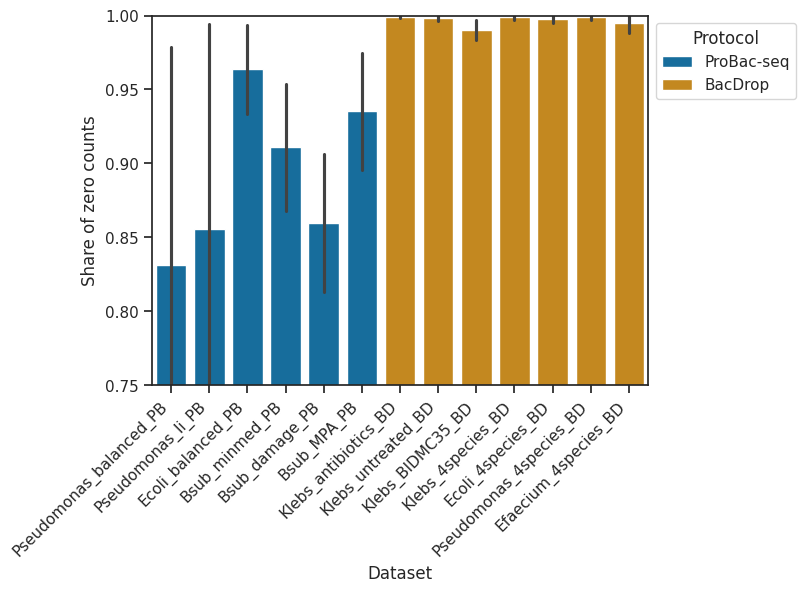

In [93]:
g = sns.barplot(seq_depth_df_raw, x="Dataset", y="Zero counts (percentage)", hue="Protocol", palette="colorblind", errorbar="sd")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
g.set(ylim=(0.75, 1), ylabel="Share of zero counts")
plt.show()

/tmp/ipykernel_1803278/804414446.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


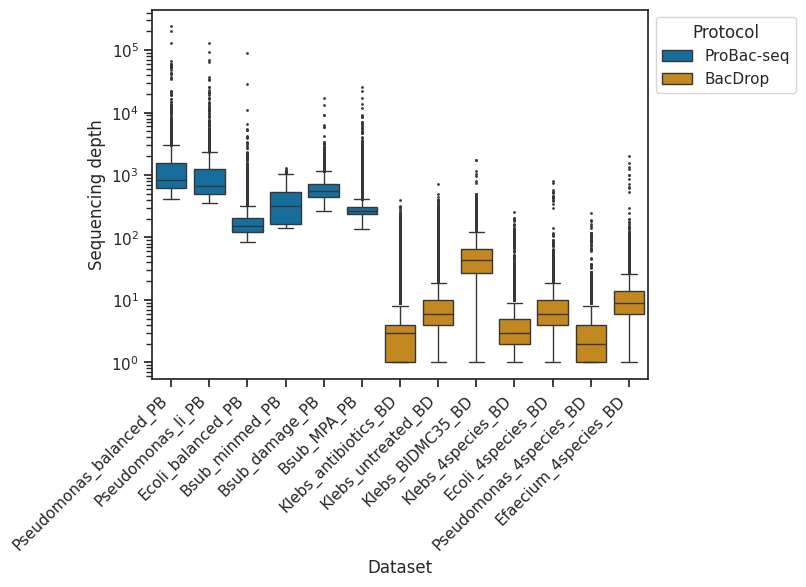

In [94]:
g = sns.boxplot(seq_depth_df_raw, x="Dataset", y="Sequencing depth", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="colorblind")
g.set(yscale="log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_1803278/4199548712.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


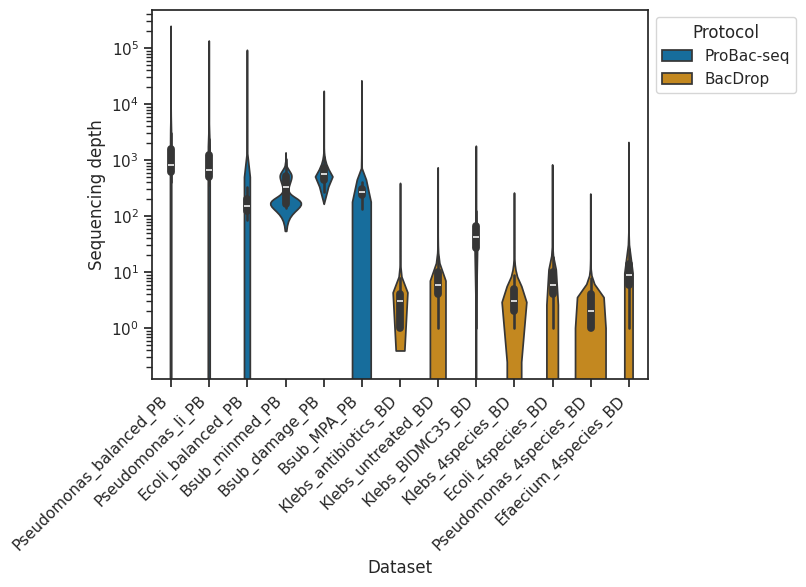

In [95]:
g = sns.violinplot(seq_depth_df_raw, x="Dataset", y="Sequencing depth", hue="Protocol", palette="colorblind")
g.set(yscale="log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_1803278/3337536909.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right")


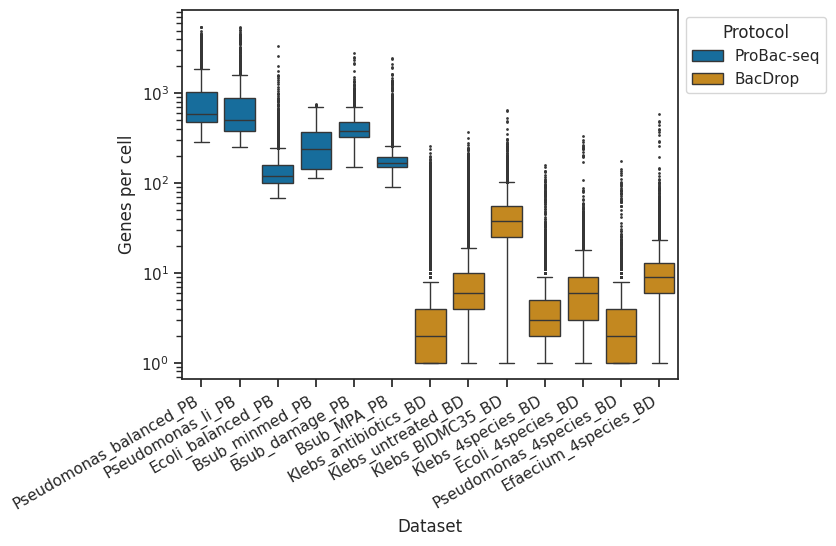

In [96]:
g = sns.boxplot(seq_depth_df_raw, x="Dataset", y="Number of genes", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="colorblind")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(ylabel="Genes per cell", yscale="log")
plt.show()

In [97]:
summary_stats_raw = {
    "n_cells": [raw_datasets[n].X.shape[0] for n in dataset_names],
    "n_genes": [raw_datasets[n].X.shape[1] for n in dataset_names],
    "min_seq_depth": [np.min(raw_datasets[n].obs["total_counts"]) for n in dataset_names],
    "max_seq_depth": [np.max(raw_datasets[n].obs["total_counts"]) for n in dataset_names],
    "median_seq_depth": [np.median(raw_datasets[n].obs["total_counts"]) for n in dataset_names],
    "zero_counts": [((np.prod(raw_datasets[n].X.shape) - raw_datasets[n].X.getnnz()) / np.prod(raw_datasets[n].X.shape)).round(3) for n in dataset_names],
    "count_max": [np.max(raw_datasets[n].X.toarray()) for n in dataset_names],
    "count_95%": [np.percentile(raw_datasets[n].X.toarray(), 95) for n in dataset_names],
    "count_99%": [np.percentile(raw_datasets[n].X.toarray(), 99) for n in dataset_names],

}

summary_df_raw = pd.DataFrame(summary_stats_raw, index=dataset_names)
summary_df_raw

,n_cells,n_genes,min_seq_depth,max_seq_depth,median_seq_depth,zero_counts,count_max,count_95%,count_99%
Pseudomonas_balanced_PB,1652,5572,413.0,240608.0,824.0,0.831,2720.0,2.0,5.0
Pseudomonas_li_PB,1326,5572,360.0,131107.0,672.5,0.856,2690.0,1.0,4.0
Ecoli_balanced_PB,4762,4181,84.0,91078.0,150.0,0.964,2145.0,0.0,2.0
Bsub_minmed_PB,2784,2959,141.0,1289.0,325.0,0.911,45.0,1.0,2.0
Bsub_damage_PB,13862,2959,268.0,17190.0,556.0,0.860,1005.0,1.0,3.0
Bsub_MPA_PB,6900,2959,136.0,25878.0,269.0,0.935,532.0,1.0,3.0
Klebs_antibiotics_BD,1234484,4514,1.0,392.0,3.0,0.999,13.0,0.0,0.0
Klebs_untreated_BD,458058,4293,1.0,728.0,6.0,0.998,30.0,0.0,0.0
Klebs_BIDMC35_BD,9936,4672,1.0,1756.0,43.0,0.990,68.0,0.0,0.0
Klebs_4species_BD,8648,4539,1.0,255.0,3.0,0.999,28.0,0.0,0.0


In [98]:
summary_df_raw.columns = ["Cells", "Genes", "Minimum seq. depth", "Maximum seq. depth", "Median seq. depth", "Zero counts (percentage)", "Maximum count", "95% quantile", "99% quantile"]
summary_df_raw["Protocol"] = [
    "ProBac-seq",        
    "ProBac-seq",
    "ProBac-seq",
    # "ProBac-seq",
    "ProBac-seq",
    "ProBac-seq",
    "ProBac-seq",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",

]


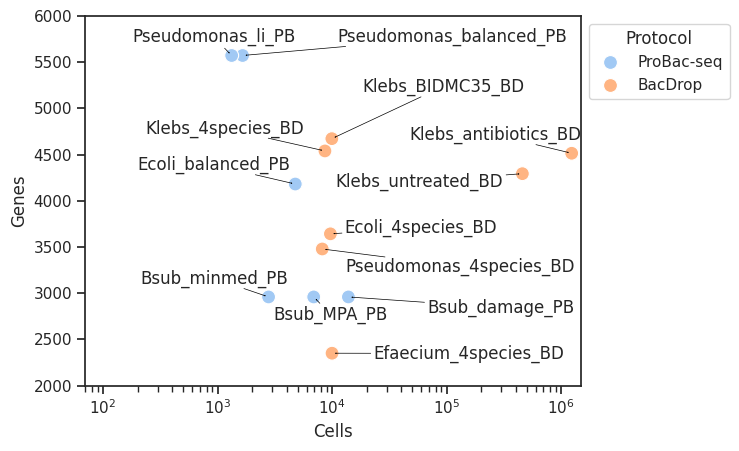

In [99]:
g = sns.scatterplot(summary_df_raw, x="Cells", y="Genes", hue="Protocol", palette="pastel", s=100)
g.set(xscale="log", ylim=(2000, 6000), xlim=(70, 1500000))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

texts = [plt.text(summary_df_raw["Cells"].tolist()[i], summary_df_raw["Genes"].tolist()[i], summary_df_raw.index.tolist()[i]) for i in range(len(dataset_names))]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5), expand=(1.2, 2), expand_axes=False)

plt.show()

In [103]:
sns.color_palette("pastel")[0]

(0.6313725490196078, 0.788235294117647, 0.9568627450980393)

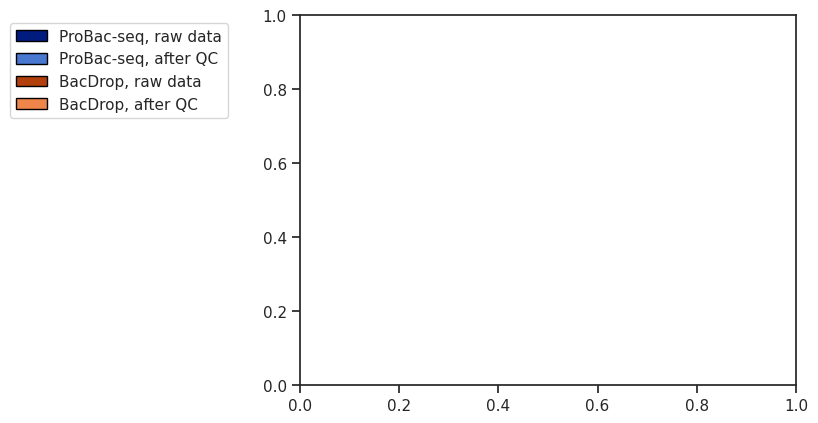

In [123]:
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=sns.color_palette("dark")[0], edgecolor='black',
                         label='ProBac-seq, raw data'),
    Patch(facecolor=sns.color_palette("muted")[0], edgecolor='black',
                         label='ProBac-seq, after QC'),
    Patch(facecolor=sns.color_palette("dark")[1], edgecolor='black',
                         label='BacDrop, raw data'),
    Patch(facecolor=sns.color_palette("muted")[1], edgecolor='black',
                         label='BacDrop, after QC'),
]
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, bbox_to_anchor=(-0.6, 1), loc="upper left")

plt.show()

               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0
/tmp/ipykernel_1803278/727190944.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  subfigs_left[1].set(xscale="log", ylim=(0, 6000), xlim=(0, 500000))
               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0
/tmp/ipykernel_1803278/727190944.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subfigs_left[2].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")
/tmp/ipykernel_1803278/727190944.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subfigs_left[3].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")
/tmp/ipykernel

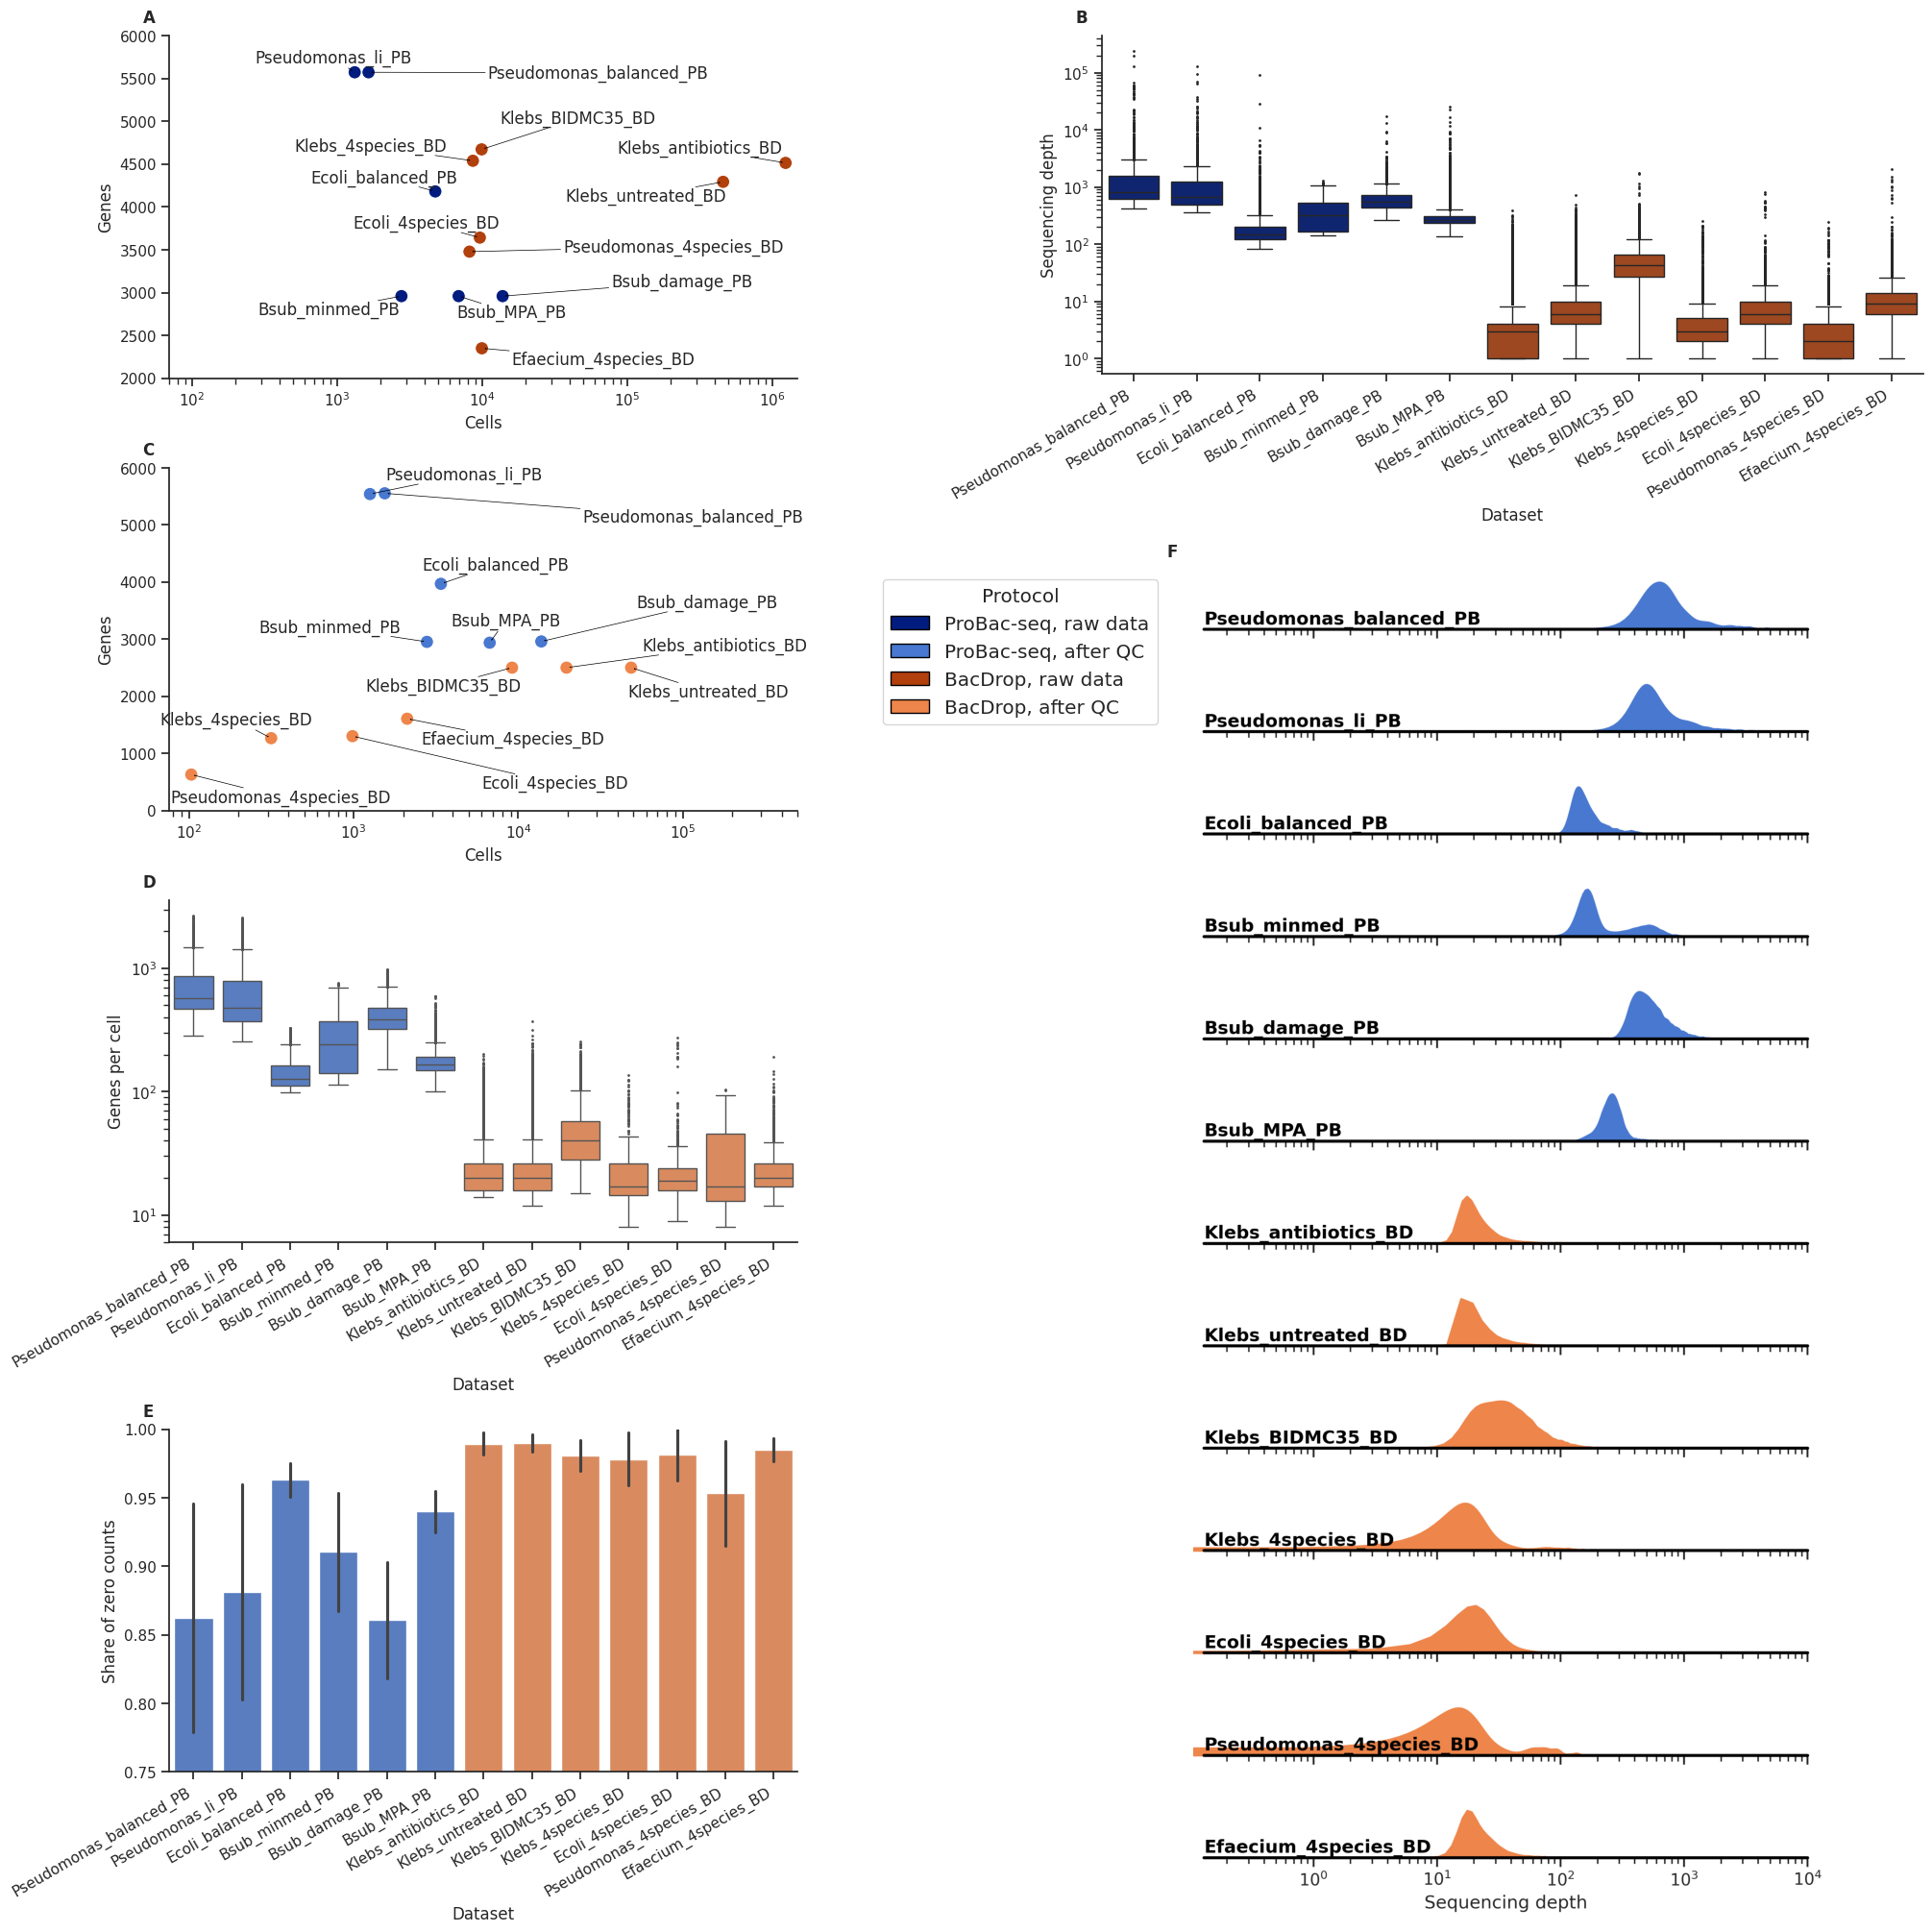

In [131]:
sns.set(style="ticks")
fig = plt.figure(layout='constrained', figsize=(20, 20))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1,1.3])

subfigs_left = subfigs[0].subplots(4, 1)

sns.scatterplot(summary_df_raw, x="Cells", y="Genes", hue="Protocol", palette="dark", s=100, ax=subfigs_left[0])
subfigs_left[0].set(xscale="log", ylim=(2000, 6000), xlim=(70, 1500000))
subfigs_left[0].legend([],[], frameon=False)
texts = [subfigs_left[0].text(summary_df_raw["Cells"].tolist()[i], summary_df_raw["Genes"].tolist()[i], summary_df_raw.index.tolist()[i]) for i in range(len(dataset_names))]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5), expand=(1.2, 2), expand_axes=False, ax=subfigs_left[0])


sns.scatterplot(summary_df, x="Cells", y="Genes", hue="Protocol", palette="muted", ax=subfigs_left[1], s=100)
subfigs_left[1].set(xscale="log", ylim=(0, 6000), xlim=(0, 500000))
subfigs_left[1].legend([],[], frameon=False)
texts = [subfigs_left[1].text(summary_df["Cells"].tolist()[i], summary_df["Genes"].tolist()[i], summary_df.index.tolist()[i]) for i in range(len(dataset_names))]
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5), expand=(1.5, 3), expand_axes=False, ax=subfigs_left[1])

g = sns.boxplot(seq_depth_df, x="Dataset", y="Number of genes", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="muted", ax=subfigs_left[2])
subfigs_left[2].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")
subfigs_left[2].legend([],[], frameon=False)
subfigs_left[2].set(ylabel="Genes per cell", yscale="log")

sns.barplot(seq_depth_df, x="Dataset", y="Zero counts (percentage)", hue="Protocol", palette="muted", ax=subfigs_left[3], errorbar="sd")
subfigs_left[3].legend([],[], frameon=False)
subfigs_left[3].set_xticklabels(subfigs_left[2].get_xticklabels(), rotation=30, horizontalalignment="right")
subfigs_left[3].set(ylim=(0.75, 1), ylabel="Share of zero counts")

subfigs_right = subfigs[1].subplots(2, 1, height_ratios=[1, 4])
img = mpimg.imread(figure_path + "/seqdepth_densities.png")
subfigs_right[1].imshow(img)
subfigs_right[1].axis('off')
subfigs_right[1].legend(handles=legend_elements, fontsize='large', title_fontsize='large', bbox_to_anchor=(-0.5, 1), loc="upper left", title="Protocol")

sns.boxplot(seq_depth_df_raw, x="Dataset", y="Sequencing depth", hue="Protocol", flierprops={"marker": "."}, fliersize=2, palette="dark", ax=subfigs_right[0])
subfigs_right[0].set(yscale="log")
subfigs_right[0].set_xticklabels(subfigs_right[0].get_xticklabels(), rotation=30, horizontalalignment="right")
subfigs_right[0].legend([],[], frameon=False)

sns.despine()
axes = [subfigs_left[0], subfigs_left[1], subfigs_left[2], subfigs_left[3], subfigs_right[0], subfigs_right[1]]
labels = ["A", "C", "D", "E", "B", "F"]

for ax, label in zip(axes, labels):
    if type(ax) == np.ndarray:
        ax = ax[0]
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontweight="bold")

plt.savefig(figure_path + "/data_exploration_v2.png", format="png", bbox_inches='tight', dpi=300)
plt.savefig(figure_path + "/data_exploration_v2.pdf", format="pdf", bbox_inches='tight')

plt.show()

In [101]:
summary_df_raw.groupby("Protocol").agg({"Cells": "median"})

,Cells
Protocol,
BacDrop,9936.0
ProBac-seq,3773.0
